Данные

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import eig, eigh, eigvals, norm, matrix_rank

books = ['Преступление и наказание', 'Дюна', 'Война и мир', 'Стеклянный трон', 'Властелин колец', 'Гарри Поттер']
users = ['Катя', 'Даша', 'Маша', 'Диана', 'Лиза', 'Алексей']

data = pd.DataFrame([
 [5.0, 3.0, 0.0, 2.0, 2.0, 2.0],
 [4.0, 3.0, 4.0, 0.0, 3.0, 3.0],
 [5.0, 2.0, 5.0, 2.0, 1.0, 1.0],
 [3.0, 5.0, 5.0, 0.0, 1.0, 1.0],
 [3.0, 3.0, 3.0, 2.0, 4.0, 5.0],
 [2.0, 3.0, 2.0, 3.0, 5.0, 5.0]],
 columns=books,
 index=users)
data

,Преступление и наказание,Дюна,Война и мир,Стеклянный трон,Властелин колец,Гарри Поттер
Катя,5.0,3.0,0.0,2.0,2.0,2.0
Даша,4.0,3.0,4.0,0.0,3.0,3.0
Маша,5.0,2.0,5.0,2.0,1.0,1.0
Диана,3.0,5.0,5.0,0.0,1.0,1.0
Лиза,3.0,3.0,3.0,2.0,4.0,5.0
Алексей,2.0,3.0,2.0,3.0,5.0,5.0


Сингулярное разложение

In [ ]:
matrix = data.values
matrix

array([[5., 3., 0., 2., 2., 2.],
       [4., 3., 4., 0., 3., 3.],
       [5., 2., 5., 2., 1., 1.],
       [3., 5., 5., 0., 1., 1.],
       [3., 3., 3., 2., 4., 5.],
       [2., 3., 2., 3., 5., 5.]])

In [ ]:
matrix.T

array([[5., 4., 5., 3., 3., 2.],
       [3., 3., 2., 5., 3., 3.],
       [0., 4., 5., 5., 3., 2.],
       [2., 0., 2., 0., 2., 3.],
       [2., 3., 1., 1., 4., 5.],
       [2., 3., 1., 1., 5., 5.]])

In [ ]:
m_p = matrix.T@matrix
m_p

array([[88., 67., 69., 32., 52., 55.],
       [67., 65., 62., 25., 49., 52.],
       [69., 62., 79., 22., 44., 47.],
       [32., 25., 22., 21., 29., 31.],
       [52., 49., 44., 29., 56., 60.],
       [55., 52., 47., 31., 60., 65.]])

Собственные числа и собственные вектора


In [ ]:
import math
import scipy
q = []
eigen_values = np.round(eig(m_p)[0], 2)
V = np.round(eig(m_p)[1], 2)
for i in eigen_values:
  if i == -0 or 0:
    continue
  q.append(np.round(math.sqrt(i), 2))
  print(q)
D = np.zeros_like(matrix, dtype= float)
D[np.diag_indices(min(matrix.shape))] = q
print('Собственные числа(q^2):', eigen_values)
print('Собственные вектора(V):', V)
print('Vt:', V.T)
print('D =', D)

[17.57]
[17.57, 6.31]
[17.57, 6.31, 3.88]
[17.57, 6.31, 3.88, 2.64]
[17.57, 6.31, 3.88, 2.64, 1.75]
[17.57, 6.31, 3.88, 2.64, 1.75, 0.56]
Собственные числа(q^2): [308.8   39.79  15.09   6.95   3.06   0.31]
Собственные вектора(V): [[ 0.5   0.3  -0.72  0.08  0.37  0.01]
 [ 0.44  0.16  0.1  -0.8  -0.37  0.04]
 [ 0.45  0.54  0.55  0.45 -0.07 -0.02]
 [ 0.21 -0.26 -0.33  0.39 -0.79  0.02]
 [ 0.39 -0.48  0.15  0.01  0.18 -0.75]
 [ 0.41 -0.53  0.2   0.06  0.25  0.66]]
Vt: [[ 0.5   0.44  0.45  0.21  0.39  0.41]
 [ 0.3   0.16  0.54 -0.26 -0.48 -0.53]
 [-0.72  0.1   0.55 -0.33  0.15  0.2 ]
 [ 0.08 -0.8   0.45  0.39  0.01  0.06]
 [ 0.37 -0.37 -0.07 -0.79  0.18  0.25]
 [ 0.01  0.04 -0.02  0.02 -0.75  0.66]]
D = [[17.57  0.    0.    0.    0.    0.  ]
 [ 0.    6.31  0.    0.    0.    0.  ]
 [ 0.    0.    3.88  0.    0.    0.  ]
 [ 0.    0.    0.    2.64  0.    0.  ]
 [ 0.    0.    0.    0.    1.75  0.  ]
 [ 0.    0.    0.    0.    0.    0.56]]


In [ ]:
f1 = matrix@V[:,0]/q[0]
f2 = matrix@V[:,1]/q[1]
f3 = matrix@V[:,2]/q[2]
f4 = matrix@V[:,3]/q[3]
f5 = matrix@V[:,4]/q[4]
f6 = matrix@V[:,5]/q[5]
U = np.array([f1,f2,f3,f4,f5,f6]).T
print(U)

[[ 0.33238475 -0.08874802 -0.84020619 -0.40909091  0.01142857  0.05357143]
 [ 0.42800228  0.12836767  0.17268041 -0.02651515  0.78857143 -0.33928571]
 [ 0.3898691   0.47385103 -0.24742268  0.71969697 -0.22285714 -0.03571429]
 [ 0.38417758  0.53724247  0.37113402 -0.54545455 -0.37714286  0.07142857]
 [ 0.46670461 -0.33122029  0.18814433  0.11742424  0.10285714  0.76785714]
 [ 0.44678429 -0.58161648  0.18556701  0.06818182 -0.41714286 -0.51785714]]


In [ ]:
np.round(U@D@V.T)

array([[5., 3., 0., 2., 2., 2.],
       [4., 3., 4., 0., 3., 3.],
       [5., 2., 5., 2., 1., 1.],
       [3., 5., 5., 0., 1., 1.],
       [3., 3., 3., 2., 4., 5.],
       [2., 3., 2., 3., 5., 5.]])

In [ ]:
matrix

array([[5., 3., 0., 2., 2., 2.],
       [4., 3., 4., 0., 3., 3.],
       [5., 2., 5., 2., 1., 1.],
       [3., 5., 5., 0., 1., 1.],
       [3., 3., 3., 2., 4., 5.],
       [2., 3., 2., 3., 5., 5.]])

SVD - библиотека

In [ ]:
from numpy import linalg
U_b, D_b, Vt_b = linalg.svd(matrix)
print('U_b: \n', U_b)
print('D_b: \n', D_b)
print('Vt_b: \n', Vt_b)

U_b: 
 [[-0.33076056 -0.0900572   0.84171678 -0.41637665  0.00736869 -0.02400417]
 [-0.42545666  0.12907766 -0.16498565 -0.02969973  0.80500886  0.35522386]
 [-0.38716491  0.47695317  0.25461385  0.71310422 -0.21888741  0.036898  ]
 [-0.38132367  0.54113485 -0.36112819 -0.5474248  -0.35891201 -0.05347924]
 [-0.46482711 -0.33401027 -0.18525814  0.11415058  0.11901532 -0.78157362]
 [-0.44521392 -0.58596463 -0.1863605   0.06727942 -0.40126334  0.50809545]]
D_b: 
 [17.57278849  6.3081019   3.88405561  2.63631938  1.74973473  0.55436048]
Vt_b: 
 [[-0.49624077 -0.43702358 -0.44552853 -0.21061808 -0.38649288 -0.41294441]
 [ 0.3012372   0.16117641  0.54418757 -0.26190485 -0.48202418 -0.53497359]
 [ 0.72342697 -0.09811285 -0.54608119  0.32519191 -0.15212779 -0.19982487]
 [ 0.07570218 -0.79840655  0.45010054  0.38826653  0.01396886  0.05726808]
 [ 0.36589835 -0.36688207 -0.06540558 -0.7937185   0.18386164  0.25188071]
 [-0.00649953 -0.03675522  0.01706344 -0.02358252  0.74908801 -0.66077732]]


In [ ]:
Vt = V.T
q = np.asarray(q)
def rank_k(k): #Усечение
  U_reduced= np.mat(U[:,:k])
  Vt_reduced = np.mat(Vt[:k,:])
  D_reduced = D[:k,:k]
  return U_reduced, D_reduced, Vt_reduced,
U_reduced, D_reduced, Vt_reduced = rank_k(2)

Характеристика объекта (книг)

In [ ]:
import pandas as pd
r_v = np.round(Vt_reduced, 3)
books = ['Преступление и наказание', 'Дюна', 'Война и мир', 'Стеклянный трон', 'Властелин колец', 'Гарри Поттер']
factors = ['f1', 'f2']

data = pd.DataFrame(r_v,
 columns=books,
 index=factors)
data

,Преступление и наказание,Дюна,Война и мир,Стеклянный трон,Властелин колец,Гарри Поттер
f1,0.5,0.44,0.45,0.21,0.39,0.41
f2,0.3,0.16,0.54,-0.26,-0.48,-0.53


Характеристика вкусов и предпочтений пользователя

In [ ]:
import pandas as pd
r_u = np.round(U_reduced, 3)
users = ['Катя', 'Даша', 'Маша', 'Диана', 'Лиза', 'Алексей']
factors = ['f1', 'f2']
#f1 - более творческие и мечтательные люди (Любят фэнтези)
#f2 - более серьезные и рациональные (Любят классику)
data = pd.DataFrame(r_u,
 columns=factors,
 index=users)
data

,f1,f2
Катя,0.332,-0.089
Даша,0.428,0.128
Маша,0.390,0.474
Диана,0.384,0.537
Лиза,0.467,-0.331
Алексей,0.447,-0.582


Вероятности для Кати

In [ ]:
print(np.round(r_v.T [0] @ r_u[0], 3))
print(np.round(r_v.T [1] @ r_u[0], 3))
print(np.round(r_v.T [2] @ r_u[0], 3))
print(np.round(r_v.T [3] @ r_u[0], 3))
print(np.round(r_v.T [4] @ r_u[0], 3))
print(np.round(r_v.T [5] @ r_u[0], 3))

0.139
0.132
0.101
0.093
0.172
0.183


Подсчёт новой матрицы А (вероятности)

In [ ]:
def calculate_A():
  a = np.zeros_like(matrix)
  for i in range(len(a)):
    for j in range(len(a[0])):
      s = np.round(r_v.T [j] @ r_u[i], 3)
      a[i][j] = s
  return a

A = calculate_A()
print(A)

[[ 0.139  0.132  0.101  0.093  0.172  0.183]
 [ 0.252  0.209  0.262  0.057  0.105  0.108]
 [ 0.337  0.247  0.431 -0.041 -0.075 -0.091]
 [ 0.353  0.255  0.463 -0.059 -0.108 -0.127]
 [ 0.134  0.153  0.031  0.184  0.341  0.367]
 [ 0.049  0.104 -0.113  0.245  0.454  0.492]]


In [ ]:
books = ['Преступление и наказание', 'Дюна', 'Война и мир', 'Стеклянный трон', 'Властелин колец', 'Гарри Поттер']
users = ['Катя', 'Даша', 'Маша', 'Диана', 'Лиза', 'Алексей']

A2 = pd.DataFrame(A,
 columns=books,
 index=users)
A2

,Преступление и наказание,Дюна,Война и мир,Стеклянный трон,Властелин колец,Гарри Поттер
Катя,0.139,0.132,0.101,0.093,0.172,0.183
Даша,0.252,0.209,0.262,0.057,0.105,0.108
Маша,0.337,0.247,0.431,-0.041,-0.075,-0.091
Диана,0.353,0.255,0.463,-0.059,-0.108,-0.127
Лиза,0.134,0.153,0.031,0.184,0.341,0.367
Алексей,0.049,0.104,-0.113,0.245,0.454,0.492


In [ ]:
A_m = np.zeros_like(matrix)
for i in range(len(A_m)):
    for j in range(len(A_m[0])):
      s = np.round(r_v.T [j] @ D_reduced @ r_u[i])
      A_m[i][j] = s

books = ['Преступление и наказание', 'Дюна', 'Война и мир', 'Стеклянный трон', 'Властелин колец', 'Гарри Поттер']
users = ['Катя', 'Даша', 'Маша', 'Диана', 'Лиза', 'Алексей']

A3 = pd.DataFrame(A_m,
 columns=books,
 index=users)
A3

,Преступление и наказание,Дюна,Война и мир,Стеклянный трон,Властелин колец,Гарри Поттер
Катя,3.0,2.0,2.0,1.0,3.0,3.0
Даша,4.0,3.0,4.0,1.0,3.0,3.0
Маша,4.0,3.0,5.0,1.0,1.0,1.0
Диана,4.0,4.0,5.0,1.0,1.0,1.0
Лиза,3.0,3.0,3.0,2.0,4.0,4.0
Алексей,3.0,3.0,2.0,3.0,5.0,5.0


MAE

In [ ]:
sum = 0
for i in range(len(A_m)):
  for j in range(len(A_m[0])):
    sum += abs(A_m[i][j] - matrix[i][j])
print('MAE =', sum/36)

MAE = 0.4722222222222222


In [ ]:
from sklearn. metrics import mean_absolute_error as mae
mae(A_m, matrix)

0.47222222222222227

MSE

In [ ]:
sum = 0
for i in range(len(A_m)):
  for j in range(len(A_m[0])):
    sum += (A_m[i][j] - matrix[i][j])**2
print('MSE =', sum/36)

MSE = 0.5833333333333334


In [ ]:
from sklearn.metrics import mean_squared_error as mse
mse(A_m, matrix)

0.5833333333333334

RMSE

In [ ]:
import math
sum = 0
for i in range(len(A_m)):
  for j in range(len(A_m[0])):
    sum += (A_m[i][j] - matrix[i][j])**2
print('RMSE =', math.sqrt(sum/36))

RMSE = 0.7637626158259734


Иерархическая кластеризация (Агломеративный)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
model = AgglomerativeClustering(2, compute_distances=True)
clastering = model.fit(A)
ac_labels = model.labels_
from collections import Counter
cnt = Counter(ac_labels)
print('Количество элементов в кластере',dict(cnt))

Количество элементов в кластере {0: 4, 1: 2}


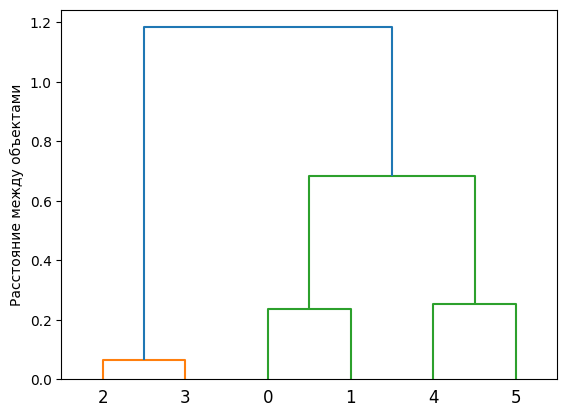

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure()
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.ylabel('Расстояние между объектами')
plt.show()